# STATS 4650

# Mental Health Illness in tech Companies

# Group 3

# Final Group project

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder


import statsmodels.api as sm


pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [2]:
df = pd.read_excel("survey.xlsx")

In [3]:
df.head(5)

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN                 
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1242 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Dropping the columns that are not contributing to our research


In [5]:
df1 = df.drop(['Country', 'state', 'Timestamp', 'self_employed','comments'], axis=1)
print(df1)

      Age  Gender family_history treatment work_interfere    no_employees  \
0      37  Female             No       Yes          Often            6-25   
1      44       M             No        No         Rarely  More than 1000   
2      32    Male             No        No         Rarely            6-25   
3      31    Male            Yes       Yes          Often          26-100   
4      31    Male             No        No          Never         100-500   
...   ...     ...            ...       ...            ...             ...   
1254   26    male             No       Yes            NaN          26-100   
1255   32    Male            Yes       Yes          Often          26-100   
1256   34    male            Yes       Yes      Sometimes  More than 1000   
1257   46       f             No        No            NaN         100-500   
1258   25    Male            Yes       Yes      Sometimes          26-100   

     remote_work tech_company    benefits care_options  ...   anonymity  \


In [6]:
df1.columns

Index(['Age', 'Gender', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

# Dropping the rows of 'no' in tech_companies variable

In [7]:
df2 = df1[~df['tech_company'].str.contains('no', case=False)]
print(df2)

      Age  Gender family_history treatment work_interfere    no_employees  \
0      37  Female             No       Yes          Often            6-25   
2      32    Male             No        No         Rarely            6-25   
3      31    Male            Yes       Yes          Often          26-100   
4      31    Male             No        No          Never         100-500   
5      33    Male            Yes        No      Sometimes            6-25   
...   ...     ...            ...       ...            ...             ...   
1252   29    male            Yes       Yes      Sometimes         100-500   
1254   26    male             No       Yes            NaN          26-100   
1255   32    Male            Yes       Yes          Often          26-100   
1256   34    male            Yes       Yes      Sometimes  More than 1000   
1257   46       f             No        No            NaN         100-500   

     remote_work tech_company benefits care_options  ...   anonymity  \
0  

# Counting the number of null values

In [8]:
df2. isna(). sum()

Age                            0
Gender                         0
family_history                 0
treatment                      0
work_interfere               216
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [9]:
df2.head()

   Age  Gender family_history treatment work_interfere no_employees  \
0   37  Female             No       Yes          Often         6-25   
2   32    Male             No        No         Rarely         6-25   
3   31    Male            Yes       Yes          Often       26-100   
4   31    Male             No        No          Never      100-500   
5   33    Male            Yes        No      Sometimes         6-25   

  remote_work tech_company benefits care_options  ...   anonymity  \
0          No          Yes      Yes     Not sure  ...         Yes   
2          No          Yes       No           No  ...  Don't know   
3          No          Yes       No          Yes  ...          No   
4         Yes          Yes      Yes           No  ...  Don't know   
5          No          Yes      Yes     Not sure  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
2  Somew

# Cleaning the variable 'Gender'

In [10]:
df2['Gender'] = df2['Gender'].str.lower()
df2['Gender'] = df2['Gender'].str.strip()
df2['Gender'] = df2['Gender'].str.replace('[^a-zA-Z]', '', regex=True)
df2


      Age  Gender family_history treatment work_interfere    no_employees  \
0      37  female             No       Yes          Often            6-25   
2      32    male             No        No         Rarely            6-25   
3      31    male            Yes       Yes          Often          26-100   
4      31    male             No        No          Never         100-500   
5      33    male            Yes        No      Sometimes            6-25   
...   ...     ...            ...       ...            ...             ...   
1252   29    male            Yes       Yes      Sometimes         100-500   
1254   26    male             No       Yes            NaN          26-100   
1255   32    male            Yes       Yes          Often          26-100   
1256   34    male            Yes       Yes      Sometimes  More than 1000   
1257   46       f             No        No            NaN         100-500   

     remote_work tech_company benefits care_options  ...   anonymity  \
0  

# Gender Mapping

In [11]:
gender_mapping = {
    'm': 'male',
    'f': 'female',
    'cisfemale': 'female',
    'cis male': 'male',
    'cisfemale': 'female',
    'woman': 'female',
    'male cis': 'male',
    'cismale': 'male',
    'man':'male',
    'msle':'male',
    'mail':'male',
    'malr':'male',
    'cisman':'male',
    'femake':'female',
    'maile':'male',
    'mal':'male',
    'femaletrans':'other',
    'agender':'other',
    'non-binary':'other',
    'transfemale':'other',
    'malecis':'male',
    'femalecis':'female',
    'fluid':'other',
    'alittleaboutyou':'other', 
    'queer':'other', 
    'maleleaningandrogynous':'male',
    'androgyne':'other', 
    'genderqueer':'other',
    'all':'other',
     'enby':'other', 
     'nah':'other', 
    'queershethey':'other', 
    'somethingkindamale':'male', 
    'maleish':'male', 
    'p':'other',
    'make':'male',
    'nonbinary':'other'}

df2['Gender'] = df2['Gender'].map(gender_mapping).fillna(df2['Gender'])
unique_values = df2['Gender'].value_counts()
print(unique_values)


male      829
female    188
other      14
Name: Gender, dtype: int64


In [12]:
df2.head(15)



    Age  Gender family_history treatment work_interfere no_employees  \
0    37  female             No       Yes          Often         6-25   
2    32    male             No        No         Rarely         6-25   
3    31    male            Yes       Yes          Often       26-100   
4    31    male             No        No          Never      100-500   
5    33    male            Yes        No      Sometimes         6-25   
6    35  female            Yes       Yes      Sometimes          1-5   
7    39    male             No        No          Never          1-5   
8    42  female            Yes       Yes      Sometimes      100-500   
9    23    male             No        No          Never       26-100   
10   31    male             No       Yes      Sometimes         6-25   
11   29    male             No        No          Never      100-500   
13   36    male            Yes        No          Never     500-1000   
14   27    male             No        No          Never         

# leave Mapping

In [13]:
leave_mapping = {"Don't know" : "No idea"}
df2['leave'] = df2['leave'].map(leave_mapping).fillna(df2['leave'])
unique_values = df2['leave'].value_counts()
print(unique_values)

No idea               456
Somewhat easy         219
Very easy             179
Somewhat difficult     98
Very difficult         79
Name: leave, dtype: int64


# Imputing the null values

In [14]:

df2['work_interfere'].fillna("I don't want to disclose", inplace=True)

df2.head(15)

    Age  Gender family_history treatment work_interfere no_employees  \
0    37  female             No       Yes          Often         6-25   
2    32    male             No        No         Rarely         6-25   
3    31    male            Yes       Yes          Often       26-100   
4    31    male             No        No          Never      100-500   
5    33    male            Yes        No      Sometimes         6-25   
6    35  female            Yes       Yes      Sometimes          1-5   
7    39    male             No        No          Never          1-5   
8    42  female            Yes       Yes      Sometimes      100-500   
9    23    male             No        No          Never       26-100   
10   31    male             No       Yes      Sometimes         6-25   
11   29    male             No        No          Never      100-500   
13   36    male            Yes        No          Never     500-1000   
14   27    male             No        No          Never         

# Checking the number of null values

In [15]:
df2. isna(). sum()

Age                          0
Gender                       0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [16]:
df3 = df2

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1257
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1031 non-null   int64 
 1   Gender                     1031 non-null   object
 2   family_history             1031 non-null   object
 3   treatment                  1031 non-null   object
 4   work_interfere             1031 non-null   object
 5   no_employees               1031 non-null   object
 6   remote_work                1031 non-null   object
 7   tech_company               1031 non-null   object
 8   benefits                   1031 non-null   object
 9   care_options               1031 non-null   object
 10  wellness_program           1031 non-null   object
 11  seek_help                  1031 non-null   object
 12  anonymity                  1031 non-null   object
 13  leave                      1031 non-null   object
 14  mental_h

# Feature Encoding

In [18]:
df3.replace("female","0", inplace = True)
df3.replace("male","1", inplace = True)
df3.replace("other","0", inplace = True)
df3.replace("Yes","1", inplace = True)
df3.replace("No","0", inplace = True)
df3.replace("Don't know","0", inplace = True)
df3.replace("I don't want to disclose","1", inplace = True)
df3.replace("Often","2", inplace = True)
df3.replace("Sometimes","3", inplace = True)
df3.replace("Rarely","4", inplace = True)
df3.replace("Never","5", inplace = True)
df3.replace("1-5","1", inplace = True)
df3.replace("6-25","2", inplace = True)
df3.replace("26-100","3", inplace = True)
df3.replace("100-500","4", inplace = True)
df3.replace("500-1000","5", inplace = True)
df3.replace("More than 1000","6", inplace = True)
df3.replace("Not sure","0", inplace = True)
df3.replace("Maybe","0", inplace = True)
df3.replace("No idea","0", inplace = True)
df3.replace("Very difficult","1", inplace = True)
df3.replace("very difficlut","1", inplace = True)
df3.replace("Somewhat difficult","2", inplace = True)
df3.replace("Somewhat easy","3", inplace = True)
df3.replace("Very easy","4", inplace = True)
df3.replace("Some of them","1", inplace = True)


In [19]:
df3.head()

   Age Gender family_history treatment work_interfere no_employees  \
0   37      0              0         1              2            2   
2   32      1              0         0              4            2   
3   31      1              1         1              2            3   
4   31      1              0         0              5            4   
5   33      1              1         0              3            2   

  remote_work tech_company benefits care_options  ... anonymity leave  \
0           0            1        1            0  ...         1     3   
2           0            1        0            0  ...         0     2   
3           0            1        0            1  ...         0     2   
4           1            1        1            0  ...         0     0   
5           0            1        1            0  ...         0     0   

  mental_health_consequence phys_health_consequence coworkers supervisor  \
0                         0                       0         1   

In [20]:
df4 = df3

In [22]:
df4.head()

   Age Gender family_history treatment work_interfere no_employees  \
0   37      0              0         1              2            2   
2   32      1              0         0              4            2   
3   31      1              1         1              2            3   
4   31      1              0         0              5            4   
5   33      1              1         0              3            2   

  remote_work tech_company benefits care_options  ... anonymity leave  \
0           0            1        1            0  ...         1     3   
2           0            1        0            0  ...         0     2   
3           0            1        0            1  ...         0     2   
4           1            1        1            0  ...         0     0   
5           0            1        1            0  ...         0     0   

  mental_health_consequence phys_health_consequence coworkers supervisor  \
0                         0                       0         1   

In [20]:
df3.head(25)

    Age Gender family_history treatment work_interfere no_employees  \
0    37      0              0         1              2            2   
2    32      1              0         0              4            2   
3    31      1              1         1              2            3   
4    31      1              0         0              5            4   
5    33      1              1         0              3            2   
6    35      0              1         1              3            1   
7    39      1              0         0              5            1   
8    42      0              1         1              3            4   
9    23      1              0         0              5            3   
10   31      1              0         1              3            2   
11   29      1              0         0              5            4   
13   36      1              1         0              5            5   
14   27      1              0         0              5            2   
15   2

# Summary Statistics

In [23]:
# Calculating summary statistics
mean = df3.mean()
median = df3.median()
mode = df3.mode().iloc[0] # mode can have multiple values, so we just take the first one
min = df3.min()
max = df3.max()
std_dev = df3.std()
variance = df3.var()

# Print results
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMode:\n", mode)
print("\nMinimum:\n", min)
print("\nMaximum:\n", max)
print("\nStandard deviation:\n", std_dev)
print("\nVariance:\n", variance)

Mean:
 Age                          9.699324e+07
Gender                                inf
family_history                        inf
treatment                             inf
work_interfere                        inf
no_employees                          inf
remote_work                           inf
tech_company                          inf
benefits                              inf
care_options                          inf
wellness_program                      inf
seek_help                             inf
anonymity                             inf
leave                                 inf
mental_health_consequence             inf
phys_health_consequence               inf
coworkers                             inf
supervisor                            inf
mental_health_interview               inf
phys_health_interview                 inf
mental_vs_physical                    inf
obs_consequence                       inf
dtype: float64

Median:
 Age                          31.0
Gender    

In [21]:
print(df3.describe())

                Age
count  1.031000e+03
mean   9.699324e+07
std    3.114373e+09
min   -1.000000e+00
25%    2.700000e+01
50%    3.100000e+01
75%    3.500000e+01
max    1.000000e+11


# Feature Selection

# Lasso Regression

In [22]:
# separating the target variable from the features
X = df3.drop('treatment', axis=1)
y = df3['treatment']

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# creating a LassoCV model object
lasso_cv = LassoCV(cv=5)

# fitting the model on the training data
lasso_cv.fit(X_train, y_train)

# getting the coefficients of each feature
coefficients = pd.Series(lasso_cv.coef_, index=X.columns)

# printing the coefficients in descending order of magnitude
print(coefficients.abs().sort_values(ascending=False))

Age                          4.916100e-12
anonymity                    0.000000e+00
mental_vs_physical           0.000000e+00
phys_health_interview        0.000000e+00
mental_health_interview      0.000000e+00
supervisor                   0.000000e+00
coworkers                    0.000000e+00
phys_health_consequence      0.000000e+00
mental_health_consequence    0.000000e+00
leave                        0.000000e+00
seek_help                    0.000000e+00
Gender                       0.000000e+00
wellness_program             0.000000e+00
care_options                 0.000000e+00
benefits                     0.000000e+00
tech_company                 0.000000e+00
remote_work                  0.000000e+00
no_employees                 0.000000e+00
work_interfere               0.000000e+00
family_history               0.000000e+00
obs_consequence              0.000000e+00
dtype: float64


# The Lasso regression implies that "Age" is the one and only significant predictor of "Treatment"

# Classification Decision Tree with original categories

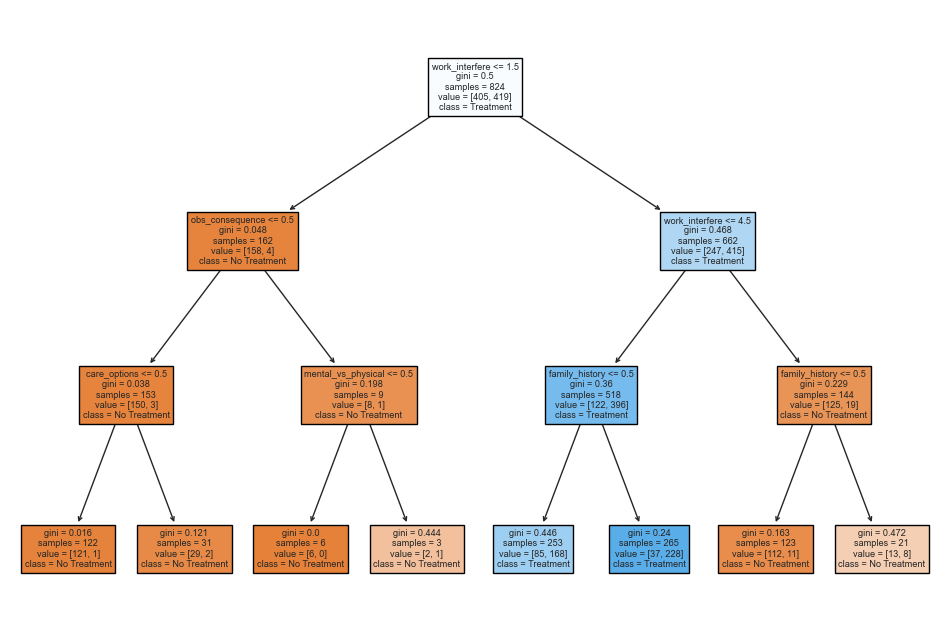

In [23]:
# separating the target variable from the features
X = df3.drop('treatment', axis=1)
y = df3['treatment']

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# Creating a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=2, random_state=42)
clf.fit(X, y)

# Fitting the classifier to the training data
clf.fit(X_train, y_train) 

# Plotting the decision tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, ax=ax, feature_names=X.columns, class_names=['No Treatment','Treatment'], filled=True)
plt.show()

# Determining the depth of the nodes of the decision tree

In [24]:
nodes = clf.tree_.node_count
node_depth = np.zeros(shape=nodes, dtype=np.int64)
is_leaves = np.zeros(shape=nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if clf.tree_.children_left[node_id] != clf.tree_.children_right[node_id]:
        stack.append((clf.tree_.children_left[node_id], parent_depth + 1))
        stack.append((clf.tree_.children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

# printing the node indices and depths
for i in range(nodes):
    print(f"Node {i}: Depth = {node_depth[i]}")

Node 0: Depth = 0
Node 1: Depth = 1
Node 2: Depth = 2
Node 3: Depth = 3
Node 4: Depth = 3
Node 5: Depth = 2
Node 6: Depth = 3
Node 7: Depth = 3
Node 8: Depth = 1
Node 9: Depth = 2
Node 10: Depth = 3
Node 11: Depth = 3
Node 12: Depth = 2
Node 13: Depth = 3
Node 14: Depth = 3


# Random Forest

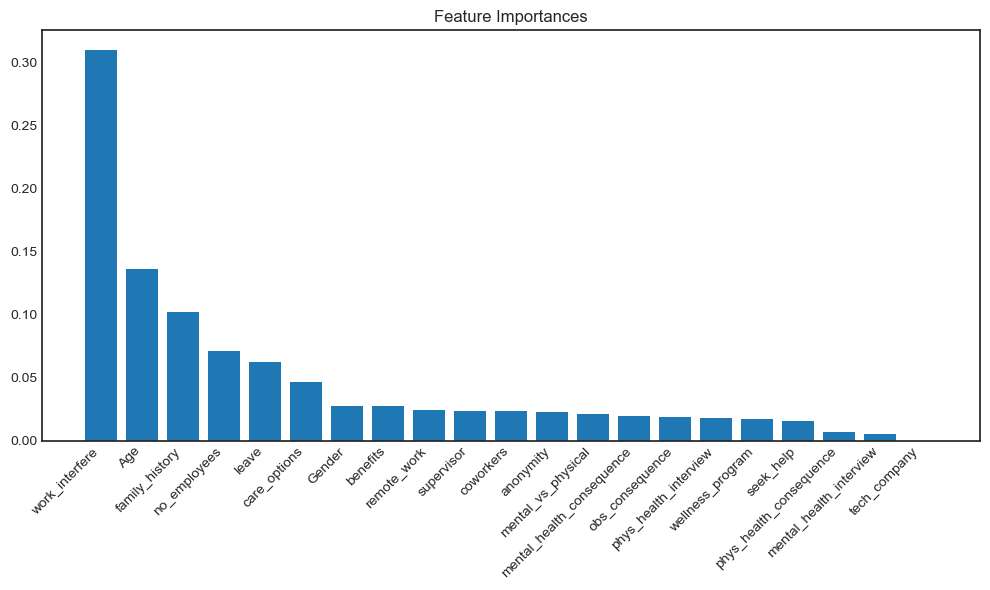

In [25]:

# Separating the target variable from the features
X = df3.drop('treatment', axis=1)
y = df3['treatment']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)

# Fitting a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Getting the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# Plotting the feature importances
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(feature_importances['Feature'], feature_importances['Importance'])
ax.set_xticklabels(feature_importances['Feature'], rotation=45, ha='right')
ax.set_title('Feature Importances')
plt.tight_layout()
plt.show()


# Relative Influence Plot

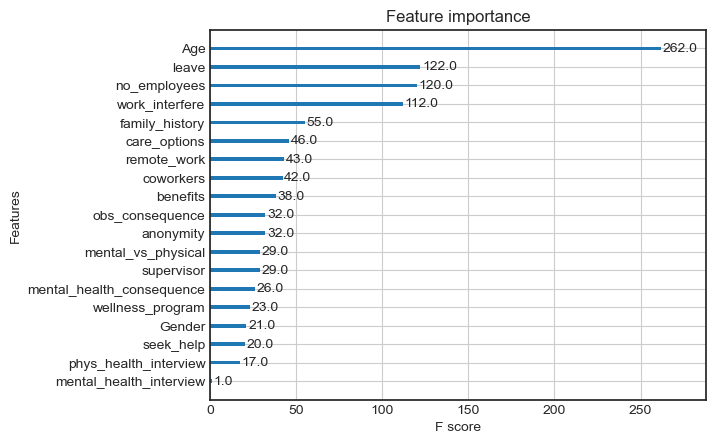

In [26]:
# Converting categorical columns to category data type
cat_cols = ['Gender', 'family_history', 'work_interfere', 'no_employees',
            'remote_work', 'tech_company', 'benefits', 'care_options',
            'wellness_program', 'seek_help', 'anonymity', 'leave',
            'mental_health_consequence', 'phys_health_consequence', 'coworkers',
            'supervisor', 'mental_health_interview', 'phys_health_interview',
            'mental_vs_physical', 'obs_consequence']

X_train[cat_cols] = X_train[cat_cols].astype('category')
X_test[cat_cols] = X_test[cat_cols].astype('category')

# Creating a DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Defining the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 4,
    'min_child_weight': 1,
    'gamma': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1
}

# Training the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()


# Creating dummy variables for work_interfere

In [29]:
# work_interfere_dummies = pd.get_dummies(df2["work_interfere"], prefix="work_interfere")

# Concatenate the dummy variables to the original DataFrame
# df3 = pd.concat([df2, work_interfere_dummies], axis=1)

In [30]:
# df3

In [31]:
# employees_dummies = pd.get_dummies(df3["no_employees"], prefix="no_employees")

# Concatenate the dummy variables to the original DataFrame
# df4 = pd.concat([df3, employees_dummies], axis=1)
# df4

In [1]:
df3 = df.sort_values("no_employees", ascending=True)

# Create a histogram of the number of employees with different colors
colors = ["blue"]  # specify colors for each category
plt.hist(df["no_employees"], bins=10, color=colors, edgecolor="black")

# Add labels and title
plt.xlabel("Number of Employees")
plt.ylabel("Frequency")
plt.title("Number of Employees Distribution")

# Show the plot
plt.show()

NameError: name 'df' is not defined

In [129]:
correlation_matrix = df4.corr()

In [130]:
for col in df4.columns:
    # Check if the column contains object or string data type
    if df4[col].dtype == 'object':
        # Convert the column to numeric data type
        df4[col] = pd.to_numeric(df4[col], errors='coerce')

In [131]:
correlation_matrix = df4.corr()

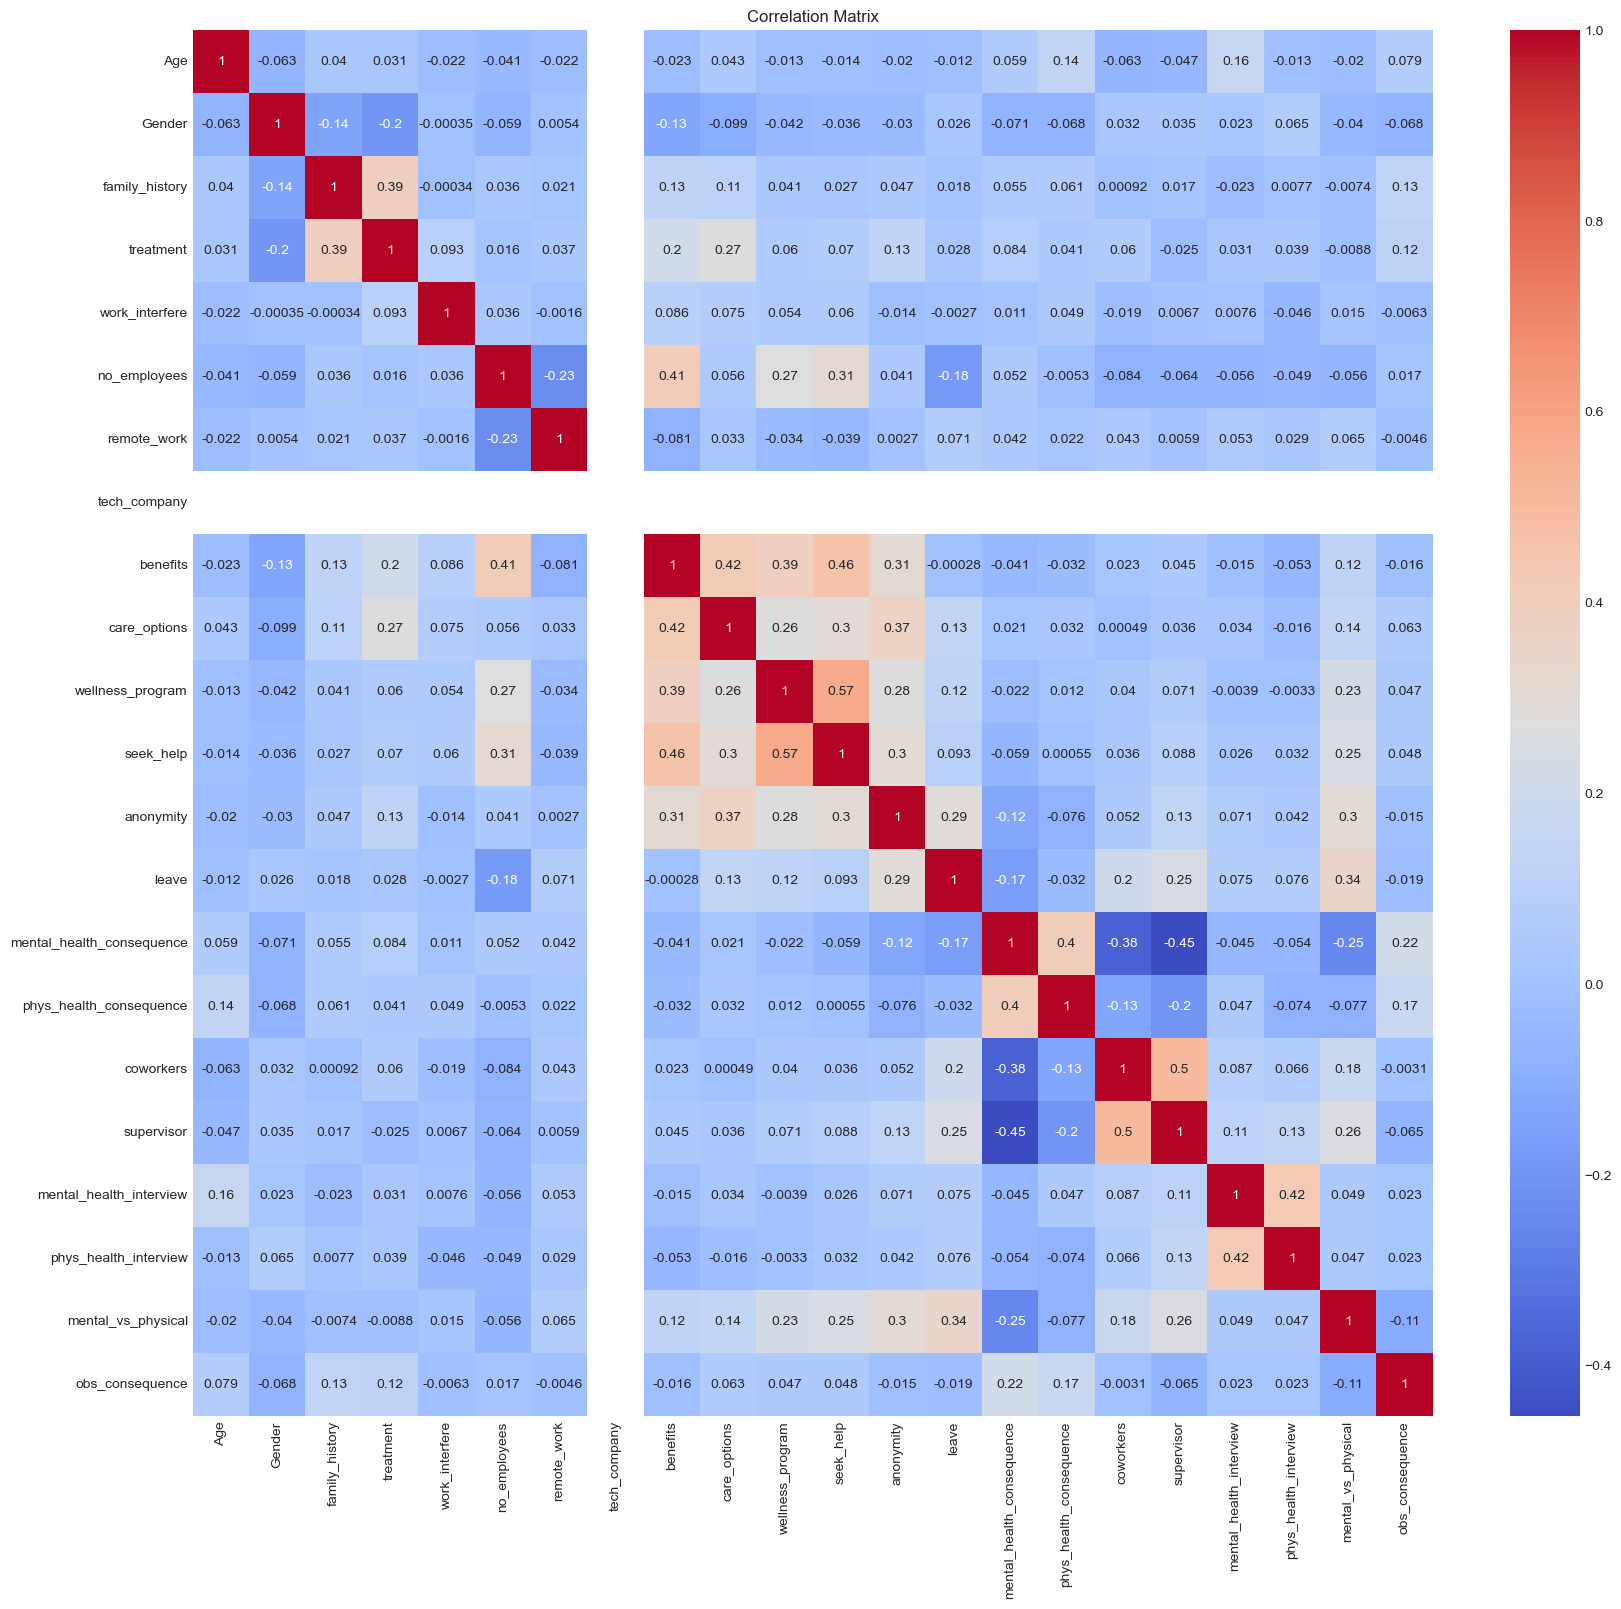

In [132]:
plt.figure(figsize=(20, 18))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Plot the heatmap
plt.title('Correlation Matrix')  # Set the title of the plot
plt.show() 

# EDA

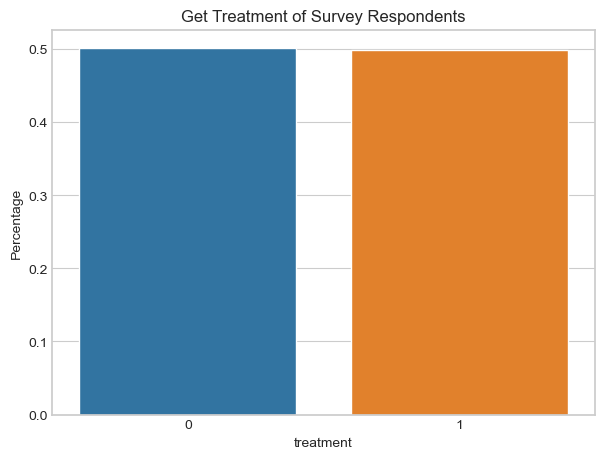

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = df4['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage)
plt.title('Get Treatment of Survey Respondents')
plt.show()

In [24]:
unique_values1 = df3['treatment'].value_counts()
print(unique_values1)

0    517
1    514
Name: treatment, dtype: int64


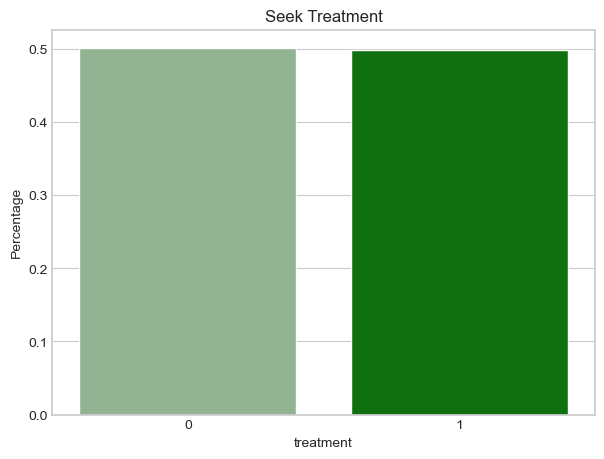

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))

# Define colors for the two categories
colors = [sns.light_palette("darkgreen")[2], "green"]

eda_percentage = df4['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage, palette=colors)
plt.title('Seek Treatment')
plt.show()


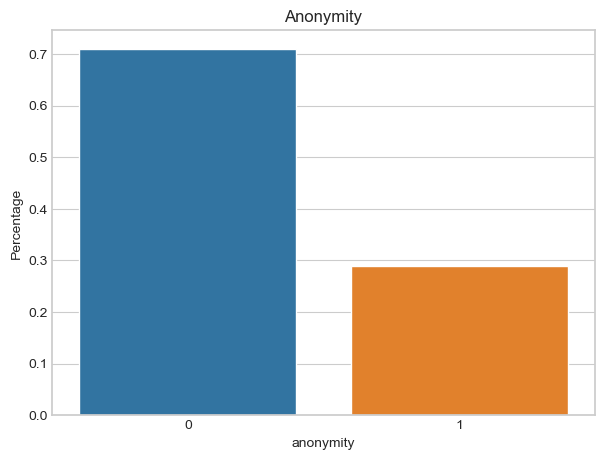

In [136]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = df4['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage)
plt.title('Anonymity')
plt.show()

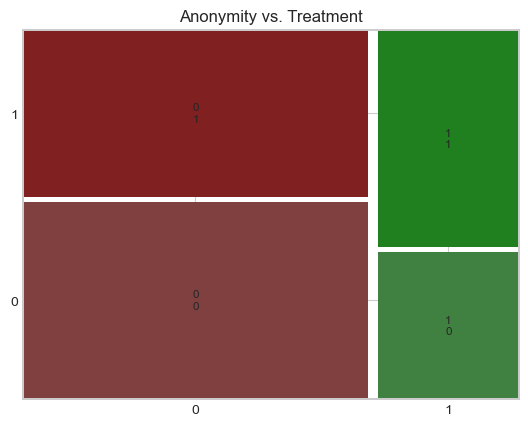

treatment    0    1
anonymity          
0          397  336
1          120  178


In [137]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['anonymity'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Anonymity vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['anonymity'], df4['treatment'])
print(cross_tab)

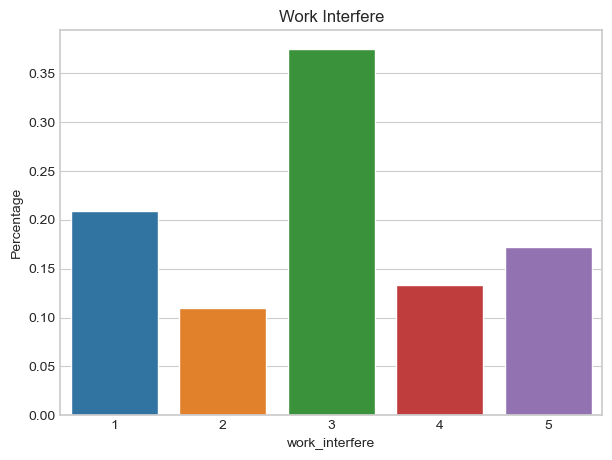

In [138]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage1 = df4['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage1)
plt.title('Work Interfere')
plt.show()

In [139]:
unique_values2 = df4['work_interfere'].value_counts()
print(unique_values2)

3    387
1    216
5    178
4    137
2    113
Name: work_interfere, dtype: int64


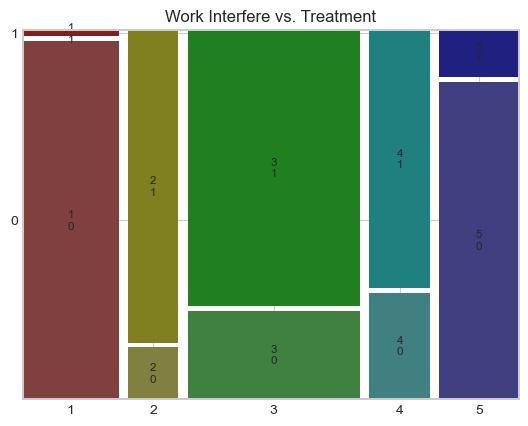

treatment         0    1
work_interfere          
1               212    4
2                16   97
3                94  293
4                40   97
5               155   23


In [140]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['work_interfere'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Work Interfere vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['work_interfere'], df4['treatment'])
print(cross_tab)

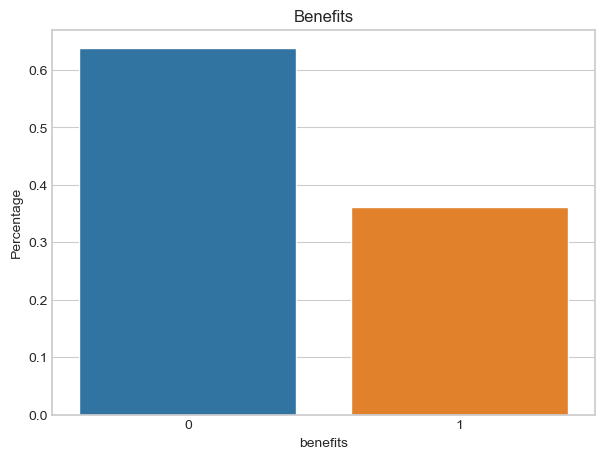

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage2 = df4['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage2.head(10))
plt.title('Benefits')
plt.show()

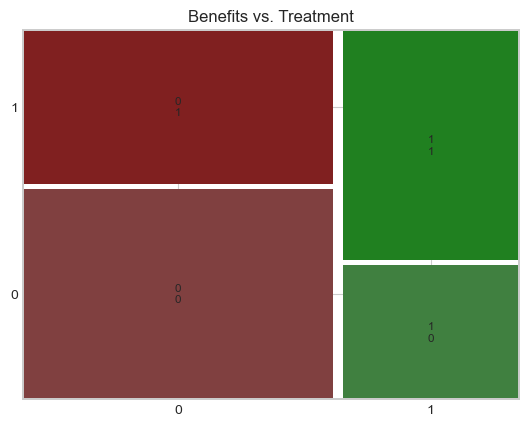

treatment    0    1
benefits           
0          380  278
1          137  236


In [142]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['benefits'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Benefits vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['benefits'], df4['treatment'])
print(cross_tab)

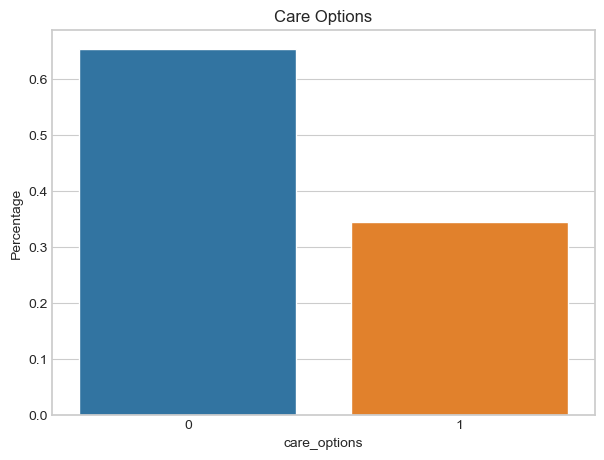

In [143]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage3 = df4['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage3.head(10))
plt.title('Care Options')
plt.show()

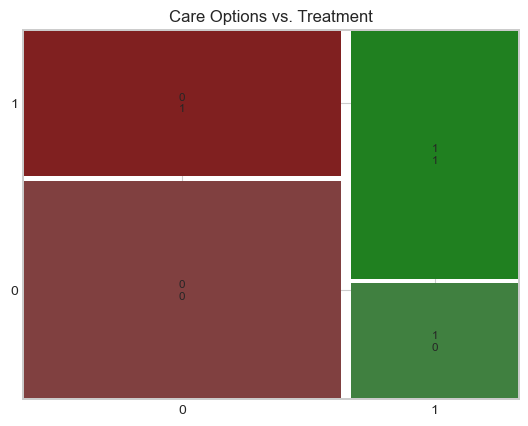

treatment       0    1
care_options          
0             404  271
1             113  243


In [144]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['care_options'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Care Options vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['care_options'], df4['treatment'])
print(cross_tab)

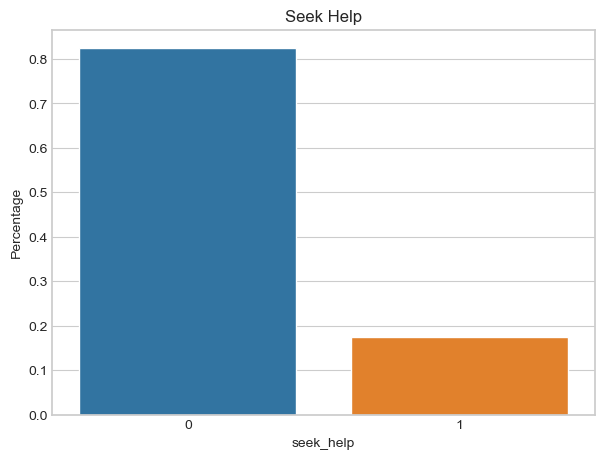

In [145]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage4 = df4['seek_help'].value_counts(normalize = True).rename_axis('seek_help').reset_index(name = 'Percentage')
sns.barplot(x = 'seek_help', y = 'Percentage', data = eda_percentage4.head(10))
plt.title('Seek Help')
plt.show()

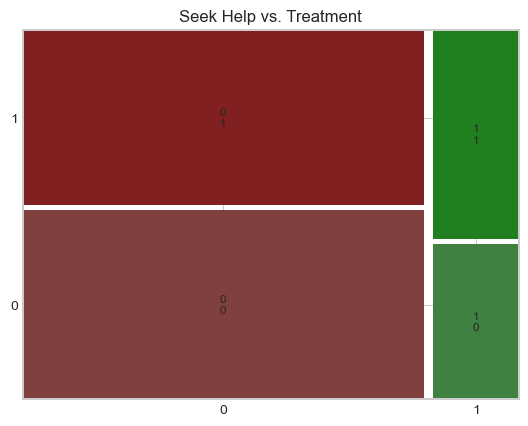

treatment    0    1
seek_help          
0          440  410
1           77  104


In [146]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['seek_help'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Seek Help vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['seek_help'], df4['treatment'])
print(cross_tab)

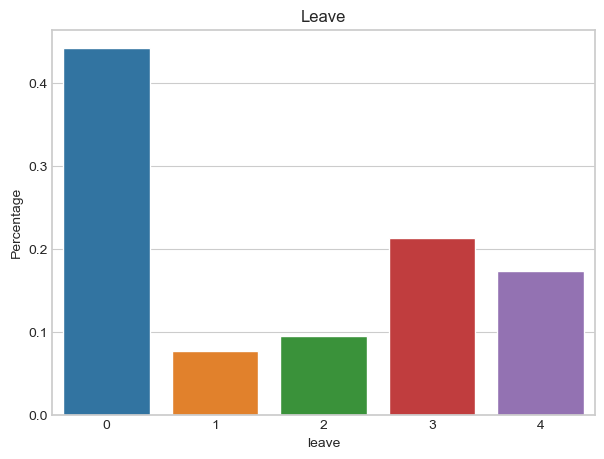

In [147]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage5 = df4['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage5.head(10))
plt.title('Leave')
plt.show()

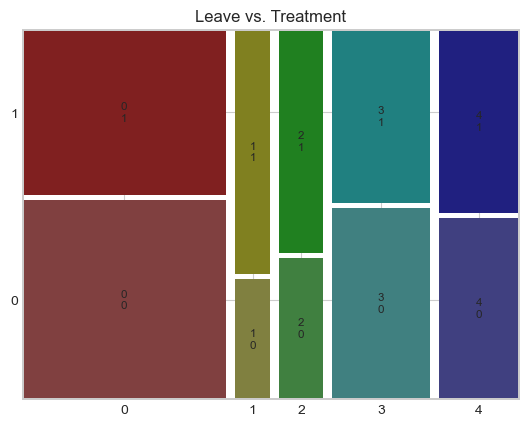

treatment    0    1
leave              
0          249  207
1           26   53
2           38   60
3          115  104
4           89   90


In [148]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['leave'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Leave vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['leave'], df4['treatment'])
print(cross_tab)

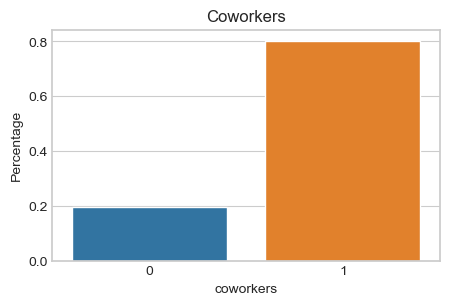

In [149]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,3))
eda_percentage6 = df4['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'Percentage')
sns.barplot(x = 'coworkers', y = 'Percentage', data = eda_percentage6.head(10))
plt.title('Coworkers')
plt.show()

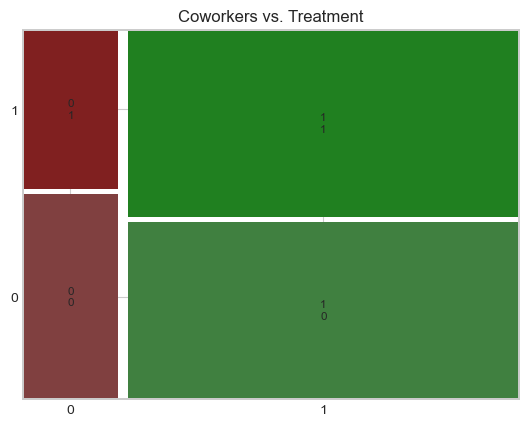

treatment    0    1
coworkers          
0          114   89
1          403  425


In [150]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['coworkers'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Coworkers vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['coworkers'], df4['treatment'])
print(cross_tab)

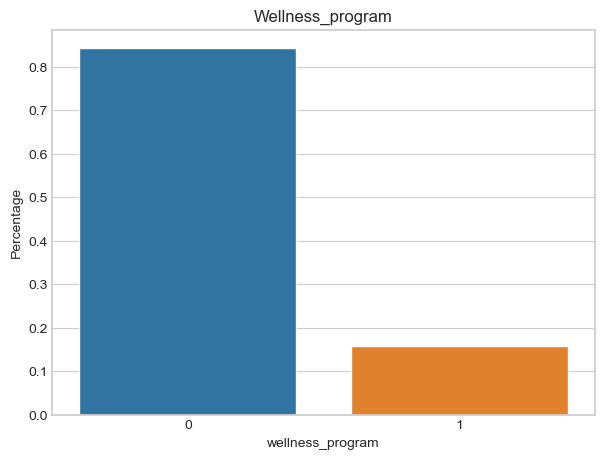

In [151]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = df4['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness_program')
plt.show()

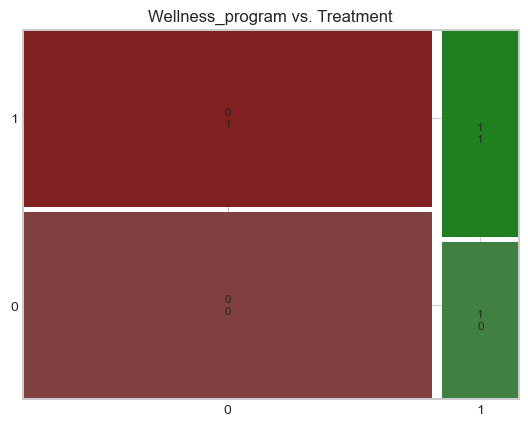

treatment           0    1
wellness_program          
0                 447  422
1                  70   92


In [152]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['wellness_program'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Wellness_program vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['wellness_program'], df4['treatment'])
print(cross_tab)

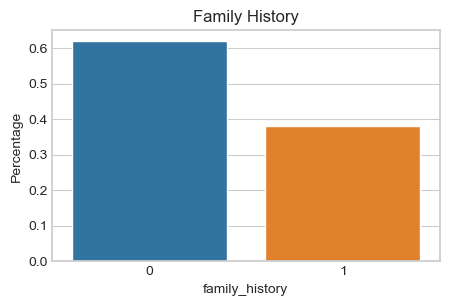

In [153]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,3))
eda_percentage6 = df4['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage6.head(10))
plt.title('Family History')
plt.show()

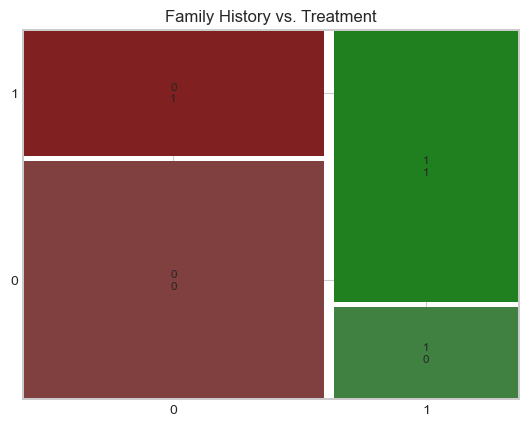

treatment         0    1
family_history          
0               418  221
1                99  293


In [154]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['family_history'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Family History vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['family_history'], df4['treatment'])
print(cross_tab)

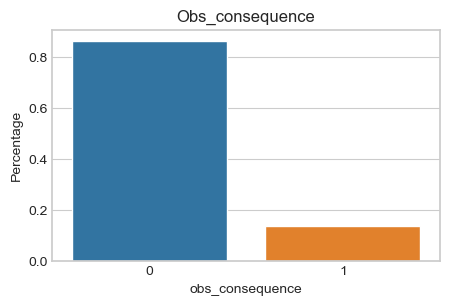

In [155]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,3))
eda_percentage6 = df4['obs_consequence'].value_counts(normalize = True).rename_axis('obs_consequence').reset_index(name = 'Percentage')
sns.barplot(x = 'obs_consequence', y = 'Percentage', data = eda_percentage6)
plt.title('Obs_consequence')
plt.show()

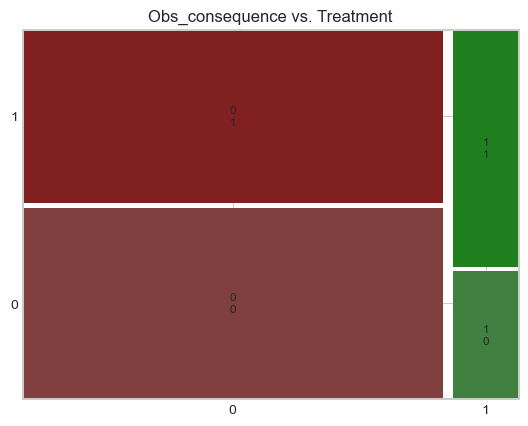

treatment          0    1
obs_consequence          
0                468  423
1                 49   91


In [156]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic_data = pd.crosstab(df4['obs_consequence'], df4['treatment'])
mosaic(mosaic_data.stack(), gap=0.02, title='Obs_consequence vs. Treatment')

plt.show()
cross_tab = pd.crosstab(df4['obs_consequence'], df4['treatment'])
print(cross_tab)

In [179]:
# le = LabelEncoder()


In [180]:
#label = le.fit_transform(df['treatment'])


In [181]:
# label

array([1, 0, 0, ..., 1, 0, 1])

In [157]:
#df.drop("treatment", axis=1, inplace=True)
#df['treatment'] = label
#df



In [ ]:
#df['work_interfere'].replace(['Sometimes', 'Never', 'Rarely', 'Often'], [1,2,3,4], inplace=True)

In [ ]:
#dummies = pd.get_dummies(df.work_interfere)
#merged = pd.concat([df, dummies], axis='columns')



In [ ]:
#merged.drop(['Sometimes', 'Never', 'Rarely', 'Often','work_interfere'], axis='columns')


In [ ]:
 # df[['work_interfere', 'benefits','family_history','care_options','leave']] = df[['work_interfere','benefits','family_history','care_options','leave']].astype(int)

In [ ]:
#df1 = pd.get_dummies(df['work_interfere'])
#df = pd.concat([df, df1], axis=1).reindex(df.index)
#df.drop('work_interfere', axis=1, inplace=True)


In [27]:
df3.head()

   Age Gender family_history treatment work_interfere no_employees  \
0   37      0              0         1              2            2   
2   32      1              0         0              4            2   
3   31      1              1         1              2            3   
4   31      1              0         0              5            4   
5   33      1              1         0              3            2   

  remote_work tech_company benefits care_options  ... anonymity leave  \
0           0            1        1            0  ...         1     3   
2           0            1        0            0  ...         0     2   
3           0            1        0            1  ...         0     2   
4           1            1        1            0  ...         0     0   
5           0            1        1            0  ...         0     0   

  mental_health_consequence phys_health_consequence coworkers supervisor  \
0                         0                       0         1   

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1257
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1031 non-null   int64 
 1   Gender                     1031 non-null   object
 2   family_history             1031 non-null   object
 3   treatment                  1031 non-null   object
 4   work_interfere             1031 non-null   object
 5   no_employees               1031 non-null   object
 6   remote_work                1031 non-null   object
 7   tech_company               1031 non-null   object
 8   benefits                   1031 non-null   object
 9   care_options               1031 non-null   object
 10  wellness_program           1031 non-null   object
 11  seek_help                  1031 non-null   object
 12  anonymity                  1031 non-null   object
 13  leave                      1031 non-null   object
 14  mental_h

# Modeling

# Splitting the data into Train and Test set

In [21]:
# separating the target variable from the features
X_model = df3.drop('treatment', axis=1)
y_model = df3['treatment']

# splitting the dataset into training and testing sets
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X, y, test_size=0.2, random_state=81)


NameError: name 'X' is not defined

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1257
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1031 non-null   int64 
 1   Gender                     1031 non-null   object
 2   family_history             1031 non-null   object
 3   treatment                  1031 non-null   object
 4   work_interfere             1031 non-null   object
 5   no_employees               1031 non-null   object
 6   remote_work                1031 non-null   object
 7   tech_company               1031 non-null   object
 8   benefits                   1031 non-null   object
 9   care_options               1031 non-null   object
 10  wellness_program           1031 non-null   object
 11  seek_help                  1031 non-null   object
 12  anonymity                  1031 non-null   object
 13  leave                      1031 non-null   object
 14  mental_h

In [29]:
print(X_train_model.columns)


Index(['Age', 'Gender', 'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')


# Fitting a Logistic regression and using a 10 fold cross-validation to determine the optimal degree of polynomial for "Age"

In [30]:
# setting the range of degrees of polynomial to test
degrees = range(1, 11)

# setting up the K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=81)

# initializing lists to store the scores and models for each degree of polynomial
scores = []
models = []

# looping through each degree of polynomial and calculate the cross-validation score
for degree in degrees:
    # set up the polynomial features transformer
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train_model.iloc[:, X_train_model.columns.get_loc('Age'):X_train_model.columns.get_loc('Age')+1])
    
    # performing K-fold cross-validation to get the average score
    fold_scores = []
    for train_index, test_index in kf.split(X_poly_train):
        X_train_fold, X_val_fold = X_poly_train[train_index], X_poly_train[test_index]
        y_train_fold, y_val_fold = y_train_model.iloc[train_index], y_train_model.iloc[test_index]
        model = LogisticRegression()
        model.fit(X_train_fold, y_train_fold)
        score = model.score(X_val_fold, y_val_fold)
        fold_scores.append(score)
        
    avg_score = np.mean(fold_scores)
    scores.append(avg_score)
    
    # training the final model using the optimal degree of polynomial and all training data
    X_poly = poly_transformer.fit_transform(X_model.iloc[:, X_model.columns.get_loc('Age'):X_model.columns.get_loc('Age')+1])
    final_model = LogisticRegression()
    final_model.fit(X_poly, y_model)
    models.append(final_model)

# finding the optimal degree of polynomial that gives the highest cross-validation score
optimal_degree = degrees[np.argmax(scores)]

print('Optimal degree of polynomial for "Age":', optimal_degree)


Optimal degree of polynomial for "Age": 1


In [31]:
df3.head(5)

   Age Gender family_history treatment work_interfere no_employees  \
0   37      0              0         1              2            2   
2   32      1              0         0              4            2   
3   31      1              1         1              2            3   
4   31      1              0         0              5            4   
5   33      1              1         0              3            2   

  remote_work tech_company benefits care_options  ... anonymity leave  \
0           0            1        1            0  ...         1     3   
2           0            1        0            0  ...         0     2   
3           0            1        0            1  ...         0     2   
4           1            1        1            0  ...         0     0   
5           0            1        1            0  ...         0     0   

  mental_health_consequence phys_health_consequence coworkers supervisor  \
0                         0                       0         1   

# Fitting Logistic Regression


In [32]:
# Selecting the independent variables and the dependent variable
independent_vars = ['work_interfere','family_history','care_options','coworkers','Gender','anonymity','benefits','seek_help','wellness_program','obs_consequence','no_employees','leave','mental_vs_physical','supervisor','mental_health_consequence','phys_health_interview','mental_health_interview','remote_work','phys_health_consequence']
dependent_var = 'treatment'

# Splitting the dataset into training and testing sets
X = df3[independent_vars]
y = df3[dependent_var]
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y, test_size=0.2, random_state=81)

# Set up the logistic regression model
model = LogisticRegression()

# Fit the model using the training data
model.fit(X_train_logistic, y_train_logistic)

# Make predictions on the test data
y_pred = model.predict(X_test_logistic)

# Evaluate the performance of the model using the accuracy score
accuracy = accuracy_score(y_test_logistic, y_pred)
print('Accuracy on test data:', accuracy*100.,'%')

# Print the coefficients of the model
coefficients = pd.DataFrame({'Variable': independent_vars, 'Coefficient': model.coef_[0]})
print(coefficients)


Accuracy on test data: 72.94685990338165 %
                     Variable  Coefficient
0              work_interfere     0.149649
1              family_history     1.665666
2                care_options     0.944987
3                   coworkers     0.813276
4                      Gender    -0.783749
5                   anonymity     0.300723
6                    benefits     0.536490
7                   seek_help    -0.178673
8            wellness_program    -0.251632
9             obs_consequence     0.273132
10               no_employees    -0.034736
11                      leave     0.001108
12         mental_vs_physical    -0.302116
13                 supervisor    -0.497333
14  mental_health_consequence     0.356624
15      phys_health_interview     0.365384
16    mental_health_interview     0.216071
17                remote_work     0.072173
18    phys_health_consequence    -0.189282


# Confusion Matrix and Error Rate: Logistic Regression

In [33]:
# Calculating confusion matrix
cm = confusion_matrix(y_test_logistic, y_pred)

# Printing confusion matrix
print('Confusion matrix:')
print(cm)

# Calculating error rate
error_rate = (cm[0, 1] + cm[1, 0]) / cm.sum()
print('The error rate from Logistic regression is:', error_rate*100.,'%')

Confusion matrix:
[[78 34]
 [22 73]]
The error rate from Logistic regression is: 27.053140096618357 %


In [34]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
print("Sensitivity: {:.2f}".format(sensitivity))

Sensitivity: 0.78


In [35]:
from sklearn.metrics import f1_score
# Make predictions on the test data
y_pred = model.predict(X_test_logistic)

# Calculate the F-1 score
f1 = f1_score(y_test_logistic, y_pred, pos_label='1')

# Print the F-1 score
print("F-1 score: {:.2f}".format(f1))

F-1 score: 0.72


# KNN

In [36]:
# Selecting the independent variables and the dependent variable
# Splitting the dataset into training and testing sets
X = df3[independent_vars]
y = df3[dependent_var]
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=81)

# Instantiate the KNN model with k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model using the training data
knn_model.fit(X_train_knn, y_train_knn)

# Make predictions on the test data
y_pred = knn_model.predict(X_test_knn)

# Evaluate the performance of the model using the accuracy score
accuracy = accuracy_score(y_test_knn, y_pred)
print('Accuracy on test data:', accuracy*100.,'%')

# Calculate the confusion matrix and error rate from the model
conf_matrix = confusion_matrix(y_test_knn, y_pred)
error_rate = (conf_matrix[0][1] + conf_matrix[1][0]) / sum(sum(conf_matrix))
print('Confusion Matrix:\n', conf_matrix)
print('Error Rate:', error_rate*100.,'%')
independent_vars = ['work_interfere','family_history','care_options','coworkers','Gender','anonymity','benefits','seek_help','wellness_program','obs_consequence','no_employees','leave','mental_vs_physical','supervisor','mental_health_consequence','phys_health_interview','mental_health_interview','remote_work','phys_health_consequence']
dependent_var = 'treatment'


Accuracy on test data: 81.64251207729468 %
Confusion Matrix:
 [[87 25]
 [13 82]]
Error Rate: 18.357487922705314 %


In [37]:
sensitivity = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
print('Sensitivity:', sensitivity)

Sensitivity: 0.8631578947368421


In [38]:
# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Specificity on test data:', specificity*100.,'%')

Specificity on test data: 77.67857142857143 %


In [39]:
f1 = f1_score(y_test_knn, y_pred, pos_label= '1')

print('F1 Score:', f1)

F1 Score: 0.8118811881188119


# Random Forest

In [40]:
# Selecting the independent variables and the dependent variable
independent_vars = ['work_interfere','family_history','care_options','coworkers','Gender','anonymity','benefits','seek_help','wellness_program','obs_consequence','no_employees','leave','mental_vs_physical','supervisor','mental_health_consequence','phys_health_interview','mental_health_interview','remote_work','phys_health_consequence']
dependent_var = 'treatment'

# Splitting the dataset into training and testing sets
X = df3[independent_vars]
y = df3[dependent_var]
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=81)

# Set up the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=81)

# Fit the model using the training data
model.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred = model.predict(X_test_rf)

# Evaluate the performance of the model using the accuracy score
accuracy = accuracy_score(y_test_rf, y_pred)
print('Accuracy on test data:', accuracy*100.,'%')

# Print the feature importances of the model
feature_importances = pd.DataFrame({'Variable': independent_vars, 'Importance': model.feature_importances_})
print(feature_importances)


Accuracy on test data: 83.57487922705315 %
                     Variable  Importance
0              work_interfere    0.357983
1              family_history    0.095288
2                care_options    0.046625
3                   coworkers    0.030496
4                      Gender    0.029449
5                   anonymity    0.025763
6                    benefits    0.031788
7                   seek_help    0.019358
8            wellness_program    0.019981
9             obs_consequence    0.023761
10               no_employees    0.094030
11                      leave    0.078270
12         mental_vs_physical    0.025260
13                 supervisor    0.028647
14  mental_health_consequence    0.024206
15      phys_health_interview    0.020320
16    mental_health_interview    0.006804
17                remote_work    0.032372
18    phys_health_consequence    0.009599


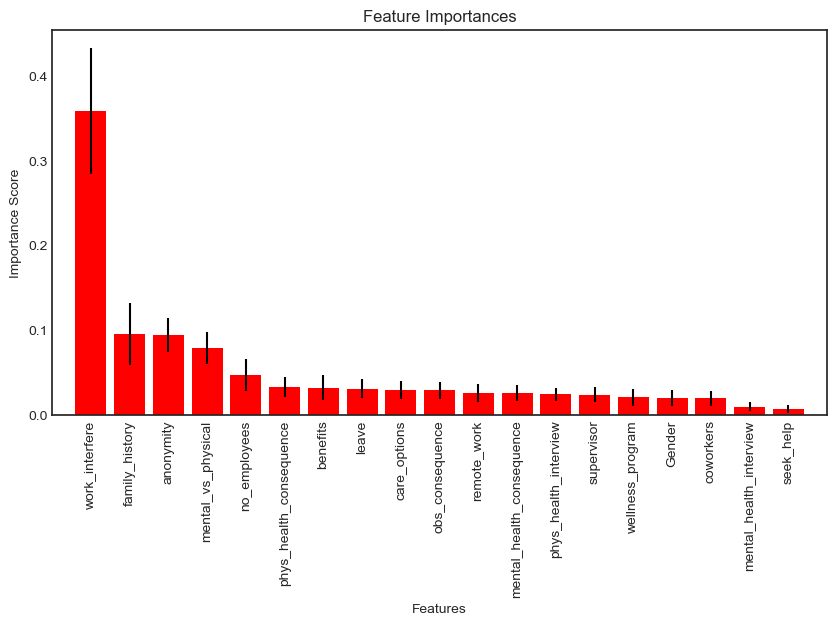

In [41]:
# Plot the feature importance scores
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]

plt.figure(figsize=(10,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [43]:
# Calculate the confusion matrix and error rate from the model
conf_matrix = confusion_matrix(y_test_rf, y_pred)
error_rate = (conf_matrix[0][1] + conf_matrix[1][0]) / sum(sum(conf_matrix))
print('Confusion Matrix:\n', conf_matrix)
print('Error Rate:', error_rate*100.,'%')

# Calculate the specificity from the confusion matrix
specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
print('Specificity:', specificity)

# Calculate the F-1 score from the precision and recall scores
from sklearn.metrics import recall_score
precision = precision_score(y_test_rf, y_pred, pos_label= '1')
recall = recall_score(y_test_rf, y_pred, pos_label= '1')
f1_score = 2 * (precision * recall) / (precision + recall)
print('F-1 Score:', f1_score)

Confusion Matrix:
 [[87 25]
 [ 9 86]]
Error Rate: 16.425120772946862 %
Specificity: 0.7767857142857143
F-1 Score: 0.8349514563106797


In [44]:
sensitivity = recall_score(y_test_rf, y_pred, pos_label= '1')
print('Sensitivity:', sensitivity)

Sensitivity: 0.9052631578947369


# XGBoost

In [45]:
#Selecting the independent and dependent variables
independent_vars = ['work_interfere', 'family_history', 'care_options', 'coworkers', 'Gender', 'anonymity', 'benefits', 'seek_help', 'wellness_program', 'obs_consequence', 'no_employees', 'leave', 'mental_vs_physical', 'supervisor', 'mental_health_consequence', 'phys_health_interview', 'mental_health_interview', 'remote_work', 'phys_health_consequence']
dependent_var = 'treatment'

X = df[independent_vars]
y = df[dependent_var]

# Creating a DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Defining the parameters for the XGBoost model
params = {
'objective': 'binary:logistic',
'eval_metric': 'error',
'max_depth': 25,
'learning_rate': 0.1,
'subsample': 0.8,
'colsample_bytree': 0.8
}

# Fitting the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100, early_stopping_rounds=10, evals=[(dtest, 'test')], verbose_eval=False)

# Making predictions on the test data
y_pred = xgb_model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculating the accuracy rate
accuracy = sum(y_pred_binary == y_test) / len(y_test)
print('Accuracy:', accuracy*100,'%')

Accuracy: 0.0 %


In [83]:

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Calculating error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()
print('Error Rate:', error_rate*100.,'%')

# Calculating specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print('Specificity:', specificity)

# Calculating sensitivity (recall)
sensitivity = recall_score(y_test, y_pred_binary)
print('Sensitivity:', sensitivity)


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['0' '1'] and y_pred=[0 1]. Make sure that the predictions provided by the classifier coincides with the true labels.

# Plotting the Feature importance by XGBoost

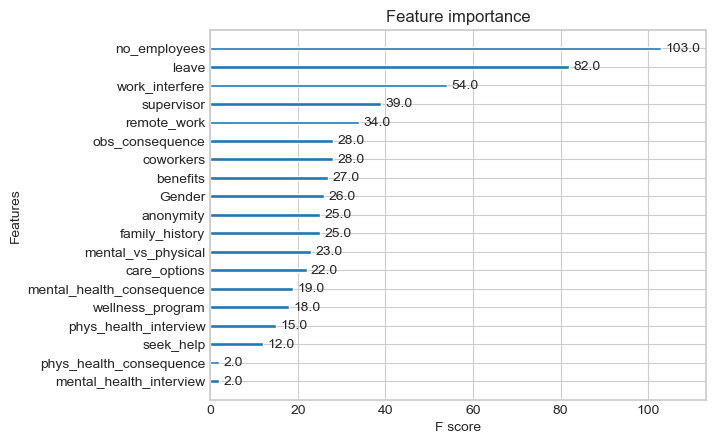

In [108]:
# Plotting the feature importance scores
xgb.plot_importance(xgb_model)
plt.show()

# XGBoost Probability Prediction

In [74]:
# The probability for each class (0 and 1) will be in separate columns
# We only need the probability for class 1 (i.e. the positive class)
y_pred_prob_positive = y_pred

# Printing the probability predictions
print('Probability Predictions:', y_pred_prob_positive)

Probability Predictions: [0.7616543  0.71723676 0.63422436 0.8803345  0.6905832  0.15459773
 0.10942667 0.12585771 0.78987205 0.36535436 0.8027326  0.8949309
 0.22052906 0.70084035 0.39603025 0.76076394 0.77550757 0.75403816
 0.85758674 0.1393503  0.15800746 0.8525561  0.12951584 0.7848608
 0.09455114 0.86042625 0.69098085 0.490244   0.09163646 0.76694125
 0.6744352  0.09882434 0.802049   0.81394726 0.70123714 0.6197133
 0.67815006 0.36543167 0.39494798 0.4505639  0.6931859  0.3840463
 0.09455114 0.10483322 0.14039062 0.09001799 0.32614523 0.13850965
 0.14275746 0.7145078  0.11621378 0.79644525 0.61597115 0.17023544
 0.13318367 0.14493798 0.43454257 0.2679831  0.2938714  0.10364962
 0.75998956 0.7256924  0.7270219  0.1942196  0.5782636  0.8121934
 0.20540614 0.76522976 0.8390843  0.88928777 0.7034678  0.3515478
 0.5419278  0.39597738 0.57436675 0.83587456 0.13593683 0.65341824
 0.4467119  0.12401647 0.8283229  0.18172333 0.27189922 0.16005708
 0.1829243  0.15294471 0.71250963 0.7925018